# Data and AI Democratization through PromptToQueryResult Function

In the context of data and AI democratization, `PromptToQueryResult` could be a function that translates natural language prompts into database queries. This could be part of a larger system that allows non-technical users to interact with databases using natural language, which would democratize access to data and AI.

## Business Value and Domain Problem Solutions

### Business Value:

- **Increased Efficiency:** Non-technical users can retrieve data without needing to learn SQL or other query languages, or without needing to wait for technical staff to retrieve the data for them.
- **Reduced Costs:** Less time and resources are spent on training staff to use complex database systems, and less time is spent on data retrieval tasks by technical staff.
- **Improved Decision Making:** With easier access to data, decision-making can be data-driven and timely, leading to better business outcomes.

### Domain Problem Solved:

- **Data Accessibility:** One of the challenges in data democratization is making data accessible to non-technical users. `PromptToQueryResult` could help solve this problem by providing a natural language interface to databases.
- **AI Democratization:** By using AI to translate natural language prompts into database queries, `PromptToQueryResult` could also contribute to AI democratization. It could be part of a system that allows users to leverage the power of AI without needing to understand the technical details.

## Implementation Details

The selected code is written in Python and it's part of a larger program that uses a plugin-based architecture. The code is using a kernel object to manage plugins and their functions.

- **Variable Definitions:** First, two variables are defined: `plugins_directory` and `file_path`. The `plugins_directory` variable is set to the string `"plugins"`, which is presumably the directory where the plugins are stored. The `file_path` variable is set to `"data_schema.txt"`, which is likely a file that contains a data schema.

- **Reading Data Schema:** The `read_data_schema_from_file` function is then called with `file_path` as an argument. This function reads the data schema from the specified file and returns it as a string. The returned data schema is stored in the `data_schema` variable.

- **Conditional Plugin Import:** Next, there's an if-statement that checks the `prompt_rephrase` variable. If `prompt_rephrase` is true, the code imports a plugin named `"PromptPlugin"` from the plugins directory using the `import_plugin_from_prompt_directory` method of the kernel object. This method returns a dictionary-like object of functions provided by the plugin. The `"PromptRephraser"` function from the `"PromptPlugin"` plugin is then stored in the `rephraserFunction` variable.

- **Function Invocation:** The `rephraserFunction` is then invoked asynchronously using the `invoke` method of the kernel object. The `invoke` method is called with two arguments: the function to be invoked and a `KernelArguments` object that contains the data schema and a query. The result of the function invocation is stored in the `rephrased_prompt` variable.

- **Importing Another Plugin:** Finally, the code imports another plugin named `"DataPlugin"` from the plugins directory and stores the `"DatabaseDescriptor"` function from this plugin in the `descriptorFunction` variable. This function can presumably be used later in the code to describe a database based on the data schema.


In [1]:
from main import GenerateQuestions
from main import ReadQuestionsAndGenerateAnswers
from main import PromptToQueryResult
from services import Service

In [ ]:
await GenerateQuestions()

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-06-23.txt", selectedService=Service.HuggingFace, debug=False)

User query: order quantity monthly trend by brand 
Rephrased prompt: Analyze the monthly sales volume trends for each bicycle brand, showing how many units were sold per brand over time. Break down the total quantity of bicycles ordered each month, comparing different brands' performance throughout the year. Recommend visualization: A multi-line chart with months on the x-axis, quantity sold on the y-axis, and different colored lines representing each brand, to easily track and compare brand performance over time.#


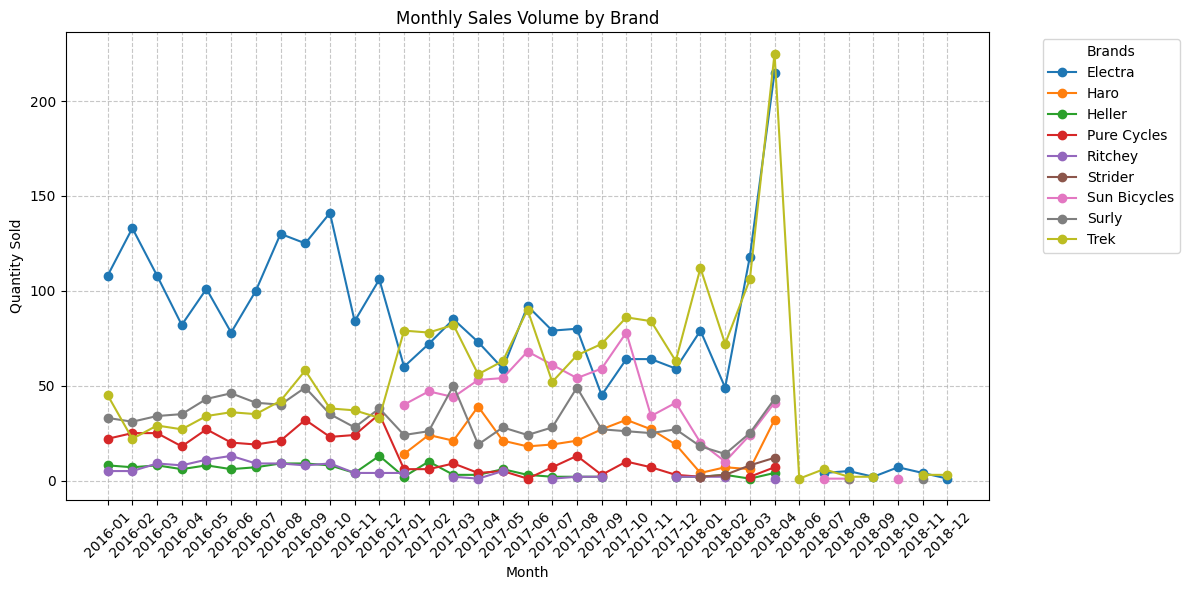

,month,brand_name,total_quantity
0,2016-01,Electra,108
1,2016-01,Heller,8
2,2016-01,Pure Cycles,22
3,2016-01,Ritchey,5
4,2016-01,Surly,33
...,...,...,...
208,2018-11,Electra,4
209,2018-11,Surly,1
210,2018-11,Trek,3
211,2018-12,Electra,1


In [30]:
await PromptToQueryResult(prompt_rephrase=True, debug=False ,selected_service=Service.ClaudeAI, huggingface_model="Llama318BInstruct", model_mode="chat")


User query: order quantity monthly trend by brand 
Rephrased prompt: Please provide a monthly analysis of order quantities categorized by brand. Consider visualizing the data using a line chart to effectively display trends over time.#


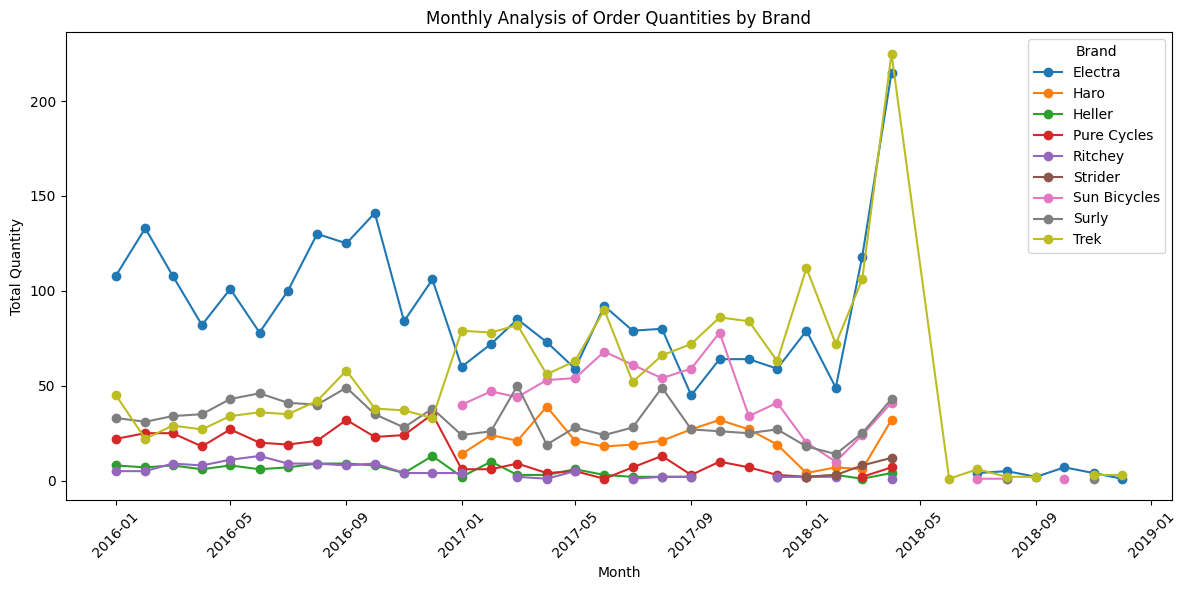

,order_month,brand_name,total_quantity
0,2016-01-01,Electra,108
1,2016-01-01,Heller,8
2,2016-01-01,Pure Cycles,22
3,2016-01-01,Ritchey,5
4,2016-01-01,Surly,33
...,...,...,...
208,2018-11-01,Electra,4
209,2018-11-01,Surly,1
210,2018-11-01,Trek,3
211,2018-12-01,Electra,1


In [31]:
await PromptToQueryResult(prompt_rephrase=True, debug=False ,selected_service=Service.AzureOpenAI, huggingface_model="Llama318BInstruct", model_mode="chat")

In [34]:
await PromptToQueryResult(prompt_rephrase=True, debug=False ,selected_service=Service.HuggingFace, huggingface_model="Llama318BInstruct", model_mode="chat")

User query: order quantity trend by brand 
Rephrased prompt: Here's a rephrased version of the prompt based on the provided data schema:

"Are sales patterns of different products varying significantly by brand over time? Can we identify which brands are seeing consistent growth, stagnation, or decline in orders compared to other counterparts?" 

Recommended chart or visualization:
Bar chart showing order quantity trend by brand:
- Use X-axis for brand names
- Use Y-axis for order quantity
- Display a line chart or a stacked bar chart to visualize the trend over time#


,order_date,brand_name,order_quantity
0,2016-01-01,Trek,1
1,2016-01-01,Trek,2
2,2016-01-01,Surly,2
3,2016-01-01,Electra,2
4,2016-01-01,Electra,1
...,...,...,...
4717,2018-11-28,Trek,2
4718,2018-11-28,Electra,2
4719,2018-12-28,Trek,1
4720,2018-12-28,Trek,2
